<a href="https://colab.research.google.com/github/jiyeon00/gs-project/blob/ml/RNNcode-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving dosirac_week.csv to dosirac_week.csv


In [ ]:
import io
import pandas as pd
dosirac_week= pd.read_csv(io.StringIO(uploaded['dosirac_week.csv'].decode('utf-8')))
dosirac_week

,판매량,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dosirac_week = dosirac_week['판매량']

In [ ]:
dosirac_week = dosirac_week.values

In [ ]:
dosirac_week = dosirac_week.astype('float32')

In [ ]:
print(dosirac_week)

[4. 2. 5. 5. 6. 5. 1. 2. 3. 1. 3. 3. 1. 2. 6. 5. 4. 7. 2. 5. 6. 7. 4. 3.
 5. 6. 4. 3. 3. 2. 4. 6. 5. 3. 4. 4. 5. 6. 8. 4. 5. 6. 4. 3.]


In [ ]:
dosirac_week = dosirac_week.reshape(-1,1)
print(dosirac_week.shape)

(44, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Dosirac_week = scaler.fit_transform(dosirac_week)
train_data, test_data = train_test_split(Dosirac_week, test_size = 0.2, shuffle=False)
print(len(train_data), len(test_data))

35 9


In [ ]:
print(train_data)

[[0.42857146]
 [0.14285715]
 [0.5714286 ]
 [0.5714286 ]
 [0.7142858 ]
 [0.5714286 ]
 [0.        ]
 [0.14285715]
 [0.28571433]
 [0.        ]
 [0.28571433]
 [0.28571433]
 [0.        ]
 [0.14285715]
 [0.7142858 ]
 [0.5714286 ]
 [0.42857146]
 [0.85714287]
 [0.14285715]
 [0.5714286 ]
 [0.7142858 ]
 [0.85714287]
 [0.42857146]
 [0.28571433]
 [0.5714286 ]
 [0.7142858 ]
 [0.42857146]
 [0.28571433]
 [0.28571433]
 [0.14285715]
 [0.42857146]
 [0.7142858 ]
 [0.5714286 ]
 [0.28571433]
 [0.42857146]]


In [ ]:
def create_dosirac(dosirac_week, look_back):
  x_data = []
  y_data = []
  for i in range(len(dosirac_week)-look_back):
    data = dosirac_week[i:(i+look_back),0]
    x_data.append(data)
    y_data.append(dosirac_week[i+look_back,0])
  return np.array(x_data), np.array(y_data)

In [ ]:
look_back = 3
x_train, y_train = create_dosirac(train_data, look_back)
x_test, y_test = create_dosirac(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32, 3) (32,)
(6, 3) (6,)


In [ ]:
X_train = np.reshape(x_train,(32, 1,3))
X_test = np.reshape(x_test, (6,1,3))
print(X_train.shape)
print(X_test.shape)


(32, 1, 3)
(6, 1, 3)


In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1,look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.3254
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2395
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2119
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2017
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1935
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1845
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1780
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1714
Epoch 12/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1646
Epoch 13/200
32/32 [=================

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])
print(TrainPredict)
print(Y_train)
print(Y_test)
print(TestPredict)

[[4.6963   ]
 [4.0324874]
 [4.6811485]
 [4.055924 ]
 [2.9987934]
 [3.9065838]
 [3.5123148]
 [2.8925025]
 [3.949224 ]
 [3.4291658]
 [3.030095 ]
 [3.606213 ]
 [4.414068 ]
 [3.8603334]
 [3.9737082]
 [5.248879 ]
 [2.7745602]
 [5.081992 ]
 [4.3999677]
 [4.8397584]
 [3.4774468]
 [3.897502 ]
 [4.5756397]
 [4.51023  ]
 [3.6844566]
 [3.8384168]
 [3.8497796]
 [3.3704562]
 [4.1993604]
 [4.519718 ]
 [4.0038176]
 [3.616921 ]]
[[5.         6.00000031 5.         1.         2.         3.00000021
  1.         3.00000021 3.00000021 1.         2.         6.00000031
  5.         4.0000001  6.99999979 2.         5.         6.00000031
  6.99999979 4.0000001  3.00000021 5.         6.00000031 4.0000001
  3.00000021 3.00000021 2.         4.0000001  6.00000031 5.
  3.00000021 4.0000001 ]]
[[7.99999969 4.0000001  5.         6.00000031 4.0000001  3.00000021]]
[[4.603895 ]
 [5.2292075]
 [3.2286067]
 [4.696427 ]
 [4.603895 ]
 [3.6844566]]


In [ ]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score : %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score : 1.60 RMSE
Test Score: 1.77 RMSE


In [ ]:
y_predict = model.predict(X_test, batch_size=3)
print('y_predict= ')
print(y_predict)
print()
print('y_test')
print(y_test)


y_predict= 
[[0.5148422 ]
 [0.6041725 ]
 [0.31837243]
 [0.52806103]
 [0.5148422 ]
 [0.38349384]]

y_test
[1.         0.42857146 0.5714286  0.7142858  0.42857146 0.28571433]


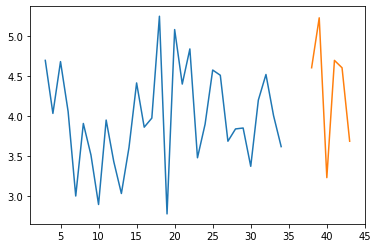

In [ ]:
trainPredictPlot = np.empty_like(dosirac_week)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(TrainPredict) + look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dosirac_week)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(TrainPredict)+(look_back)*2 : len(dosirac_week),:] = TestPredict
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()